# 深度学习100例 | 第26天-卷积神经网络（CNN）：乳腺癌识别

## 1.前期准备

### 1.1 # 导入数据

《深度学习100例》第26天的数据链接如下：

https://pan.baidu.com/s/1cWMvsl37MOZdxnoOjSGoNQ（提取码：borf）

In [2]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt

data_dir = "F:\DeepLearning\day-26\data"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*')))
print("图片总数为：",image_count)

图片总数为： 13403


In [3]:
batch_size = 16
img_height = 50
img_width  = 50

In [4]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13403 files belonging to 2 classes.
Using 10723 files for training.


In [5]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13403 files belonging to 2 classes.
Using 2680 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


### 1.2 检查数据

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 50, 50, 3)
(16,)


### 1.3 配置数据集

 -    **shuffle\(\) ：** 打乱数据，关于此函数的详细介绍可以参考：https://zhuanlan.zhihu.com/p/42417456
 -    **prefetch\(\) ：** 预取数据，加速运行，其详细介绍可以参考我前两篇文章，里面都有讲解。
 -    **cache\(\) ：** 将数据集缓存到内存当中，加速运行

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

def train_preprocessing(image,label):
    return (image/255.0,label)

train_ds = (
    train_ds.cache()
    .shuffle(1000)
    .map(train_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)           # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds.cache()
    .shuffle(1000)
    .map(train_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)         # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

### 1.4 数据可视化

C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20083 (\N{CJK UNIFIED IDEOGRAPH-4E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33146 (\N{CJK UNIFIED IDEOGRAPH-817A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30284 (\N{CJK UNIFIED IDEOGRAPH-764C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32454 (\N{CJK UNIFIED IDEOGRAPH-7EC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32990 (\N{CJK UNIFIED IDEOGR

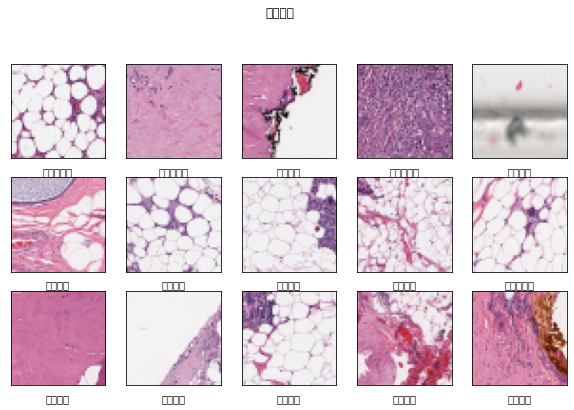

In [9]:
plt.figure(figsize=(10, 8))  # 图形的宽为10高为5
plt.suptitle("数据展示")

class_names = ["乳腺癌细胞","正常细胞"]

for images, labels in train_ds.take(1):
    for i in range(15):
        plt.subplot(4, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        # 显示图片
        plt.imshow(images[i])
        # 显示标签
        plt.xlabel(class_names[labels[i]-1])

plt.show()

## 2.构建模型

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=[img_width, img_height, 3]),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"),

    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                    

## 3.编译

In [11]:
model.compile(optimizer="adam",
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 4.训练模型

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

NO_EPOCHS = 100
PATIENCE  = 5
VERBOSE   = 1

# 设置动态学习率
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.99 ** (x+NO_EPOCHS))

# 设置早停
earlystopper = EarlyStopping(monitor='loss', patience=PATIENCE, verbose=VERBOSE)

# 
checkpointer = ModelCheckpoint('best_model.h5',
                                monitor='val_accuracy',
                                verbose=VERBOSE,
                                save_best_only=True,
                                save_weights_only=True)

In [13]:
train_model  = model.fit(train_ds,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=val_ds,
                  callbacks=[earlystopper, checkpointer, annealer])

Epoch 1/100
671/671 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.6867
Epoch 1: val_accuracy improved from -inf to 0.74963, saving model to best_model.h5
671/671 [==============================] - 36s 52ms/step - loss: 0.5680 - accuracy: 0.6867 - val_loss: 0.5079 - val_accuracy: 0.7496 - lr: 3.6603e-04
Epoch 2/100
670/671 [============================>.] - ETA: 0s - loss: 0.4319 - accuracy: 0.8094
Epoch 2: val_accuracy improved from 0.74963 to 0.78582, saving model to best_model.h5
671/671 [==============================] - 24s 35ms/step - loss: 0.4315 - accuracy: 0.8096 - val_loss: 0.4598 - val_accuracy: 0.7858 - lr: 3.6237e-04
Epoch 3/100
670/671 [============================>.] - ETA: 0s - loss: 0.4158 - accuracy: 0.8169
Epoch 3: val_accuracy improved from 0.78582 to 0.82463, saving model to best_model.h5
671/671 [==============================] - 23s 35ms/step - loss: 0.4158 - accuracy: 0.8170 - val_loss: 0.4195 - val_accuracy: 0.8246 - lr: 3.5875e-04
Epoc

671/671 [==============================] - ETA: 0s - loss: 0.2907 - accuracy: 0.8789
Epoch 27: val_accuracy did not improve from 0.88955
671/671 [==============================] - 24s 36ms/step - loss: 0.2907 - accuracy: 0.8789 - val_loss: 0.3130 - val_accuracy: 0.8851 - lr: 2.8186e-04
Epoch 28/100
670/671 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8831
Epoch 28: val_accuracy did not improve from 0.88955
671/671 [==============================] - 27s 40ms/step - loss: 0.2823 - accuracy: 0.8831 - val_loss: 0.3215 - val_accuracy: 0.8780 - lr: 2.7904e-04
Epoch 29/100
671/671 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.8822
Epoch 29: val_accuracy improved from 0.88955 to 0.89142, saving model to best_model.h5
671/671 [==============================] - 25s 38ms/step - loss: 0.2821 - accuracy: 0.8822 - val_loss: 0.2801 - val_accuracy: 0.8914 - lr: 2.7625e-04
Epoch 30/100
671/671 [==============================] - ETA: 0s - loss: 0.2774

Epoch 54/100
671/671 [==============================] - ETA: 0s - loss: 0.2411 - accuracy: 0.8997
Epoch 54: val_accuracy did not improve from 0.89963
671/671 [==============================] - 27s 40ms/step - loss: 0.2411 - accuracy: 0.8997 - val_loss: 0.2893 - val_accuracy: 0.8862 - lr: 2.1487e-04
Epoch 55/100
671/671 [==============================] - ETA: 0s - loss: 0.2411 - accuracy: 0.9010
Epoch 55: val_accuracy did not improve from 0.89963
671/671 [==============================] - 31s 46ms/step - loss: 0.2411 - accuracy: 0.9010 - val_loss: 0.2678 - val_accuracy: 0.8940 - lr: 2.1273e-04
Epoch 56/100
671/671 [==============================] - ETA: 0s - loss: 0.2389 - accuracy: 0.9001
Epoch 56: val_accuracy improved from 0.89963 to 0.90224, saving model to best_model.h5
671/671 [==============================] - 28s 42ms/step - loss: 0.2389 - accuracy: 0.9001 - val_loss: 0.2441 - val_accuracy: 0.9022 - lr: 2.1060e-04
Epoch 57/100
670/671 [============================>.] - ETA: 0s -

670/671 [============================>.] - ETA: 0s - loss: 0.2195 - accuracy: 0.9096
Epoch 81: val_accuracy did not improve from 0.90709
671/671 [==============================] - 32s 48ms/step - loss: 0.2193 - accuracy: 0.9097 - val_loss: 0.2512 - val_accuracy: 0.8996 - lr: 1.6381e-04
Epoch 82/100
671/671 [==============================] - ETA: 0s - loss: 0.2197 - accuracy: 0.9078
Epoch 82: val_accuracy did not improve from 0.90709
671/671 [==============================] - 33s 49ms/step - loss: 0.2197 - accuracy: 0.9078 - val_loss: 0.2423 - val_accuracy: 0.9030 - lr: 1.6217e-04
Epoch 83/100
670/671 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9072
Epoch 83: val_accuracy did not improve from 0.90709
671/671 [==============================] - 30s 45ms/step - loss: 0.2189 - accuracy: 0.9070 - val_loss: 0.2355 - val_accuracy: 0.9034 - lr: 1.6055e-04
Epoch 84/100
671/671 [==============================] - ETA: 0s - loss: 0.2140 - accuracy: 0.9112
Epoch 84: val_a

## 5.评估模型

### 5.1 Accuracy与Loss图

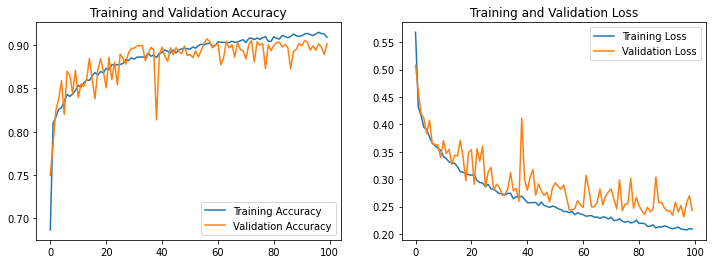

In [14]:
acc = train_model.history['accuracy']
val_acc = train_model.history['val_accuracy']

loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 5.2 混淆矩阵

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions):
    
    # 生成混淆矩阵
    conf_numpy = confusion_matrix(labels, predictions)
    # 将矩阵转化为 DataFrame
    conf_df = pd.DataFrame(conf_numpy, index=class_names ,columns=class_names)  
    
    plt.figure(figsize=(8,7))
    
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)

In [16]:
import numpy as np

val_pre   = []
val_label = []

for images, labels in val_ds:#这里可以取部分验证数据（.take(1)）生成混淆矩阵
    for image, label in zip(images, labels):
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(image, 0) 
        # 使用模型预测图片中的人物
        prediction = model.predict(img_array)

        val_pre.append(class_names[np.argmax(prediction)])
        val_label.append(class_names[label])

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 20083 (\N{CJK UNIFIED IDEOGRAPH-4E73}) missing from current font.
  fig.canvas.draw()
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 33146 (\N{CJK UNIFIED IDEOGRAPH-817A}) missing from current font.
  fig.canvas.draw()
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 30284 (\N{CJK UNIFIED IDEOGRAPH-764C}) missing from current font.
  fig.canvas.draw()
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 32454 (\N{CJK UNIFIED IDEOGRAPH-7EC6}) missing from current font.
  fig.canvas.draw()
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 32990 (\N{CJK UNIFIED IDEOGRAPH-80DE}) missing from current font.
  fig.canvas.draw()
C:\Users\fangjian\Miniconda3\envs\py38\lib\site-packages\seaborn\utils.py:95: UserWar

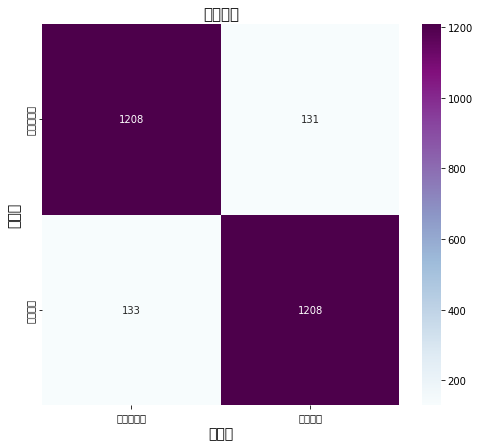

In [17]:
plot_cm(val_label, val_pre)

### 5.3 各项指标评估

In [18]:
from sklearn import metrics

def test_accuracy_report(model):
    print(metrics.classification_report(val_label, val_pre, target_names=class_names)) 
    score = model.evaluate(val_ds, verbose=0)
    print('Loss function: %s, accuracy:' % score[0], score[1])
    
test_accuracy_report(model)

              precision    recall  f1-score   support

       乳腺癌细胞       0.90      0.90      0.90      1339
        正常细胞       0.90      0.90      0.90      1341

    accuracy                           0.90      2680
   macro avg       0.90      0.90      0.90      2680
weighted avg       0.90      0.90      0.90      2680

Loss function: 0.2427629679441452, accuracy: 0.9014925360679626
